# Lab 2 : Exploratory Data Analysis
**Daniel Leskiewicz**

## Introduction
Within this lab, we cleaned the data and we are trying to determine how predictive our features are of the price and type of properties within the table. We created different plots to visualize the correlation between on independent variable and the dependent variable.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

### Loading in the cleaned data

In [2]:
data = pd.read_csv("UpdatedAndCleanedSacramentorealestatetransactions.csv")

In [3]:
data.head(20)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot,street_type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False,ST
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False,CT
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False,ST
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False,WAY
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False,DR
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False,CT
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,False,WAY
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,False,AVE
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,False,Unit
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,False,ST


#### Converting the variables city, state, zip, beds, and baths into categorical types.

In [4]:
data['city'] = data['city'].astype("category")

In [5]:
data['state'] = data['state'].astype("category")

In [6]:
data['zip'] = data['zip'].astype("category")

In [7]:
data['beds'] = data['beds'].astype("category")

In [8]:
data['baths'] = data['baths'].astype("category")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   street       985 non-null    object  
 1   city         985 non-null    category
 2   zip          985 non-null    category
 3   state        985 non-null    category
 4   beds         985 non-null    category
 5   baths        985 non-null    category
 6   sq__ft       985 non-null    int64   
 7   type         985 non-null    object  
 8   sale_date    985 non-null    object  
 9   price        985 non-null    int64   
 10  latitude     985 non-null    float64 
 11  longitude    985 non-null    float64 
 12  empty_lot    985 non-null    bool    
 13  street_type  985 non-null    object  
dtypes: bool(1), category(5), float64(2), int64(2), object(4)
memory usage: 72.1+ KB


#### a) Creating a scatter plot for the continous variable versus price. With the independent variable on the horizontal axis and the dependent variable on the vertical axis.

<AxesSubplot:xlabel='sq__ft', ylabel='price'>

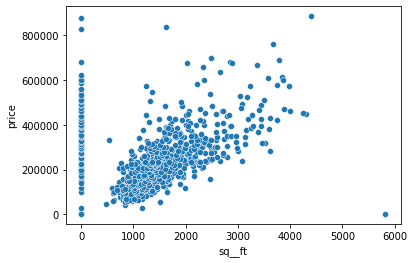

In [10]:
sns.scatterplot(x='sq__ft', y='price', data=data)

#### The sq__ft and price seem to have a linear relationship past about 500 sq__ft.  So we can say that it is very predicitive. 

<AxesSubplot:xlabel='latitude', ylabel='price'>

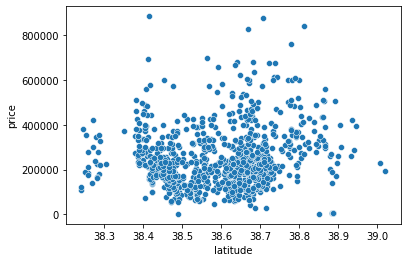

In [11]:
sns.scatterplot(x='latitude', y='price', data=data)

#### The latitude and price seem to not have a good predictive relationship

<AxesSubplot:xlabel='longitude', ylabel='price'>

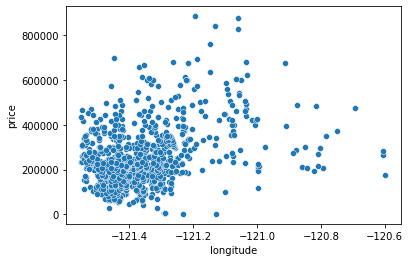

In [12]:
sns.scatterplot(x='longitude', y='price', data=data)

#### The longitude and price seems to be sort of predictive, I would want to color each variable with a individual component to see what kind of boundary we would have.

| Predictive | Not so Predictive | 
| ---- | ----- | 
| Longitude | | 
| sq__ft | |
| | Latitude |

### Creating a box plot of the categorical variable versus  the price. 

In [24]:
sns.set_theme(style="whitegrid")

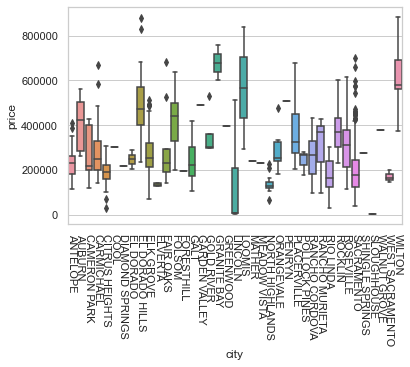

In [31]:
sns.boxplot(x='city', y='price', data=data)
plt.xticks(x=data['city'], rotation=-90)
plt.show()

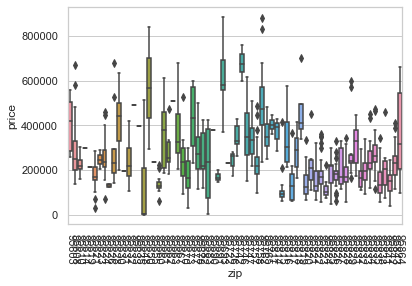

In [25]:
sns.boxplot(x='zip',y='price',data=data)
plt.xticks(x=data['zip'], rotation=-90)
plt.show()

<AxesSubplot:xlabel='beds', ylabel='price'>

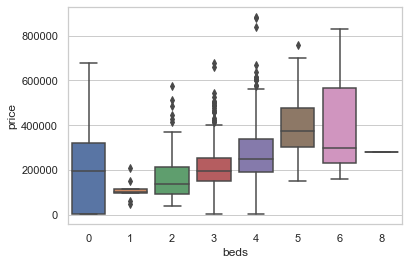

In [26]:
sns.boxplot(x='beds',y='price',data=data)

<AxesSubplot:xlabel='baths', ylabel='price'>

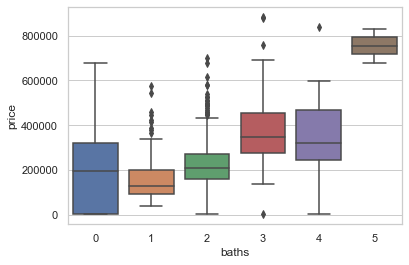

In [27]:
sns.boxplot(x='baths',y='price',data=data)

<AxesSubplot:xlabel='type', ylabel='price'>

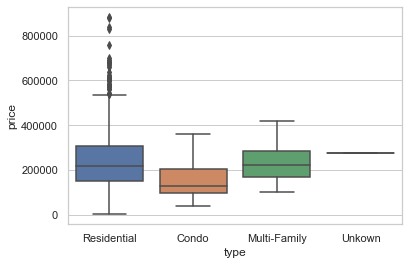

In [28]:
sns.boxplot(x='type',y='price',data=data)

<AxesSubplot:xlabel='empty_lot', ylabel='price'>

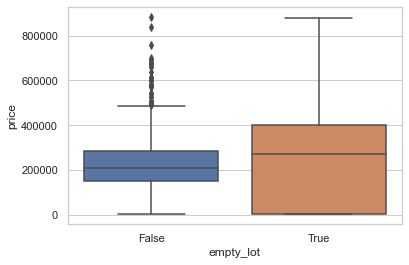

In [29]:
sns.boxplot(x='empty_lot',y='price',data=data)

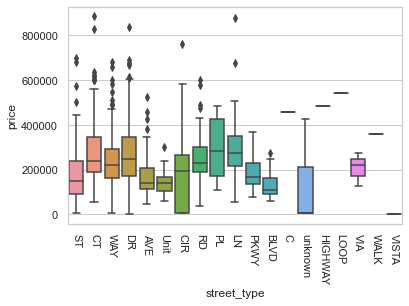

In [32]:
sns.boxplot(x='street_type',y='price',data=data)
plt.xticks(x=data['zip'], rotation=-90)
plt.show()

#### The predictive categorical variables would city, zip, beds, baths, and type.
#### The non predictive categorical variables are state, empty_lot, and street type

### Part 2: Classification on Property Types

In [33]:
data = data[data.type != 'Unkown']

<AxesSubplot:xlabel='type', ylabel='sq__ft'>

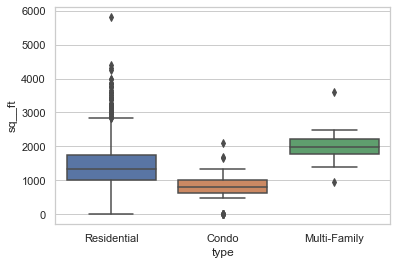

In [34]:
sns.boxplot(x='type',y='sq__ft',data=data)

<AxesSubplot:xlabel='type', ylabel='price'>

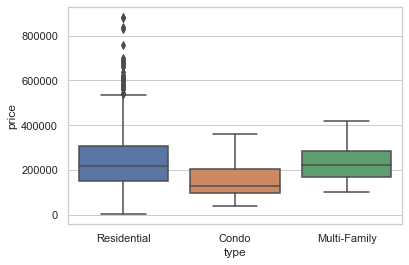

In [35]:
sns.boxplot(x='type',y='price',data=data)

<AxesSubplot:xlabel='type', ylabel='latitude'>

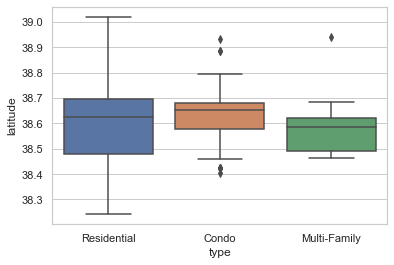

In [36]:
sns.boxplot(x='type',y='latitude',data=data)

<AxesSubplot:xlabel='type', ylabel='longitude'>

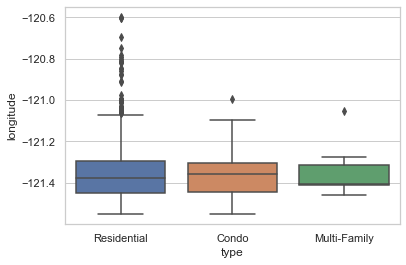

In [37]:
sns.boxplot(x='type',y='longitude',data=data)

#### The predictive categorical variables would be price, sq ft.

#### The non predictive categorical variables are latitude, longitude.

In [38]:
data['count'] = 0

<ipython-input-38-1ac7df8a6d49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count'] = 0


<AxesSubplot:xlabel='type', ylabel='zip'>

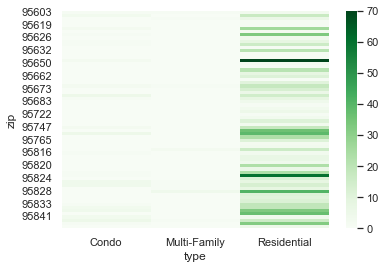

In [39]:
data2 = data.groupby(['type','zip']).count()
table1 = pd.pivot_table(data2, 'count', 'zip', 'type')
sns.heatmap(table1, cmap='Greens')

<AxesSubplot:xlabel='type', ylabel='city'>

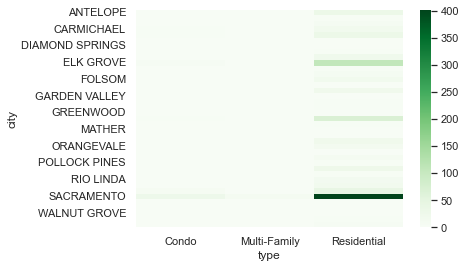

In [40]:
data2 = data.groupby(['type','city']).count()
table1 = pd.pivot_table(data2, 'count', 'city', 'type')
sns.heatmap(table1, cmap='Greens')

<AxesSubplot:xlabel='type', ylabel='state'>

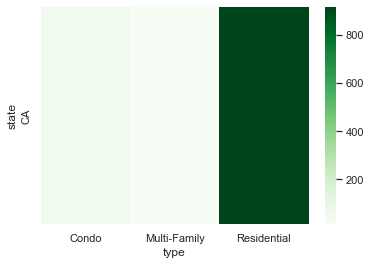

In [41]:
data2 = data.groupby(['type','state']).count()
table1 = pd.pivot_table(data2, 'count', 'state', 'type')
sns.heatmap(table1, cmap='Greens')

<AxesSubplot:xlabel='type', ylabel='beds'>

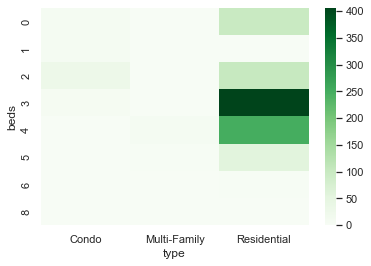

In [42]:
data2 = data.groupby(['type','beds']).count()
table1 = pd.pivot_table(data2, 'count', 'beds', 'type')
sns.heatmap(table1, cmap='Greens')

<AxesSubplot:xlabel='type', ylabel='baths'>

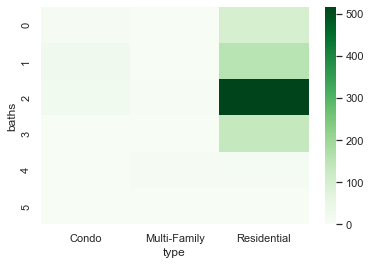

In [43]:
data2 = data.groupby(['type','baths']).count()
table1 = pd.pivot_table(data2, 'count', 'baths', 'type')
sns.heatmap(table1, cmap='Greens')

<AxesSubplot:xlabel='type', ylabel='empty_lot'>

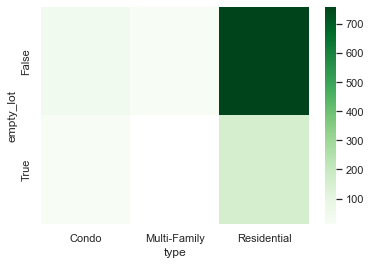

In [44]:
data2 = data.groupby(['type','empty_lot']).count()
table1 = pd.pivot_table(data2, 'count', 'empty_lot', 'type')
sns.heatmap(table1, cmap='Greens')

<AxesSubplot:xlabel='type', ylabel='street_type'>

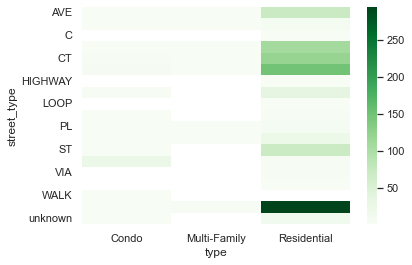

In [45]:
data2 = data.groupby(['type','street_type']).count()
table1 = pd.pivot_table(data2, 'count', 'street_type', 'type')
sns.heatmap(table1, cmap='Greens')

#### The predictive categorical variables would city, zip, beds, baths, and street type.
#### The non predictive categorical variables are state, empty_lot.

### Part 3 : Compare Predictive Variables

a)

A Venn Diagram of the variables described as a predictive variable

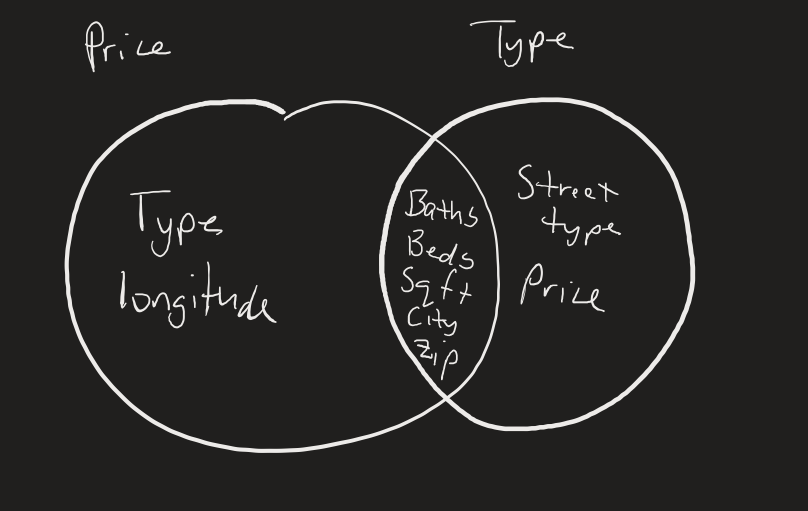

In [48]:
Image("Diagram.png")

b) How many variables are predictive for both problems.


The amount of variables that are predictive for both problems are 5.

c)

|Variables | Predictablility |
| --- | ---- |
| Longititude| We can see that the longitude was the best with the price variables compared to the type. There is some sort of correlation with price rather than with type.
| Latitude | From looking at the graphs latitude doesn't really look like it correlates well with any other variables such as price and type. 
| Type | We can see that it correlates well with the price seeing how each type differs. So Price would be the best variable.
| Price | Bascially the inverse of the last statement. Price was a good predictor on the type of property it was. 
| Street Type | This variable was best predicted the type and not with price. This is probably because some of the places are just on those types of streets so there some correlation. 
| Sq__ft | Sq ft was predictable by both of the variables so we can see that certain types were more and or less in size and the cost was similar to that trend that if the sq ft is bigger than the price is bigger and vise versa.
| City | Was a good with price and type because the type like suburbs and inner city prices do get affected so location is a big deal and the price of the locations decrease and increase so both of these did a good job.
| ZipCode | Zip codes corresponded to the places and locations above to an extent so they were good with price and types
| Baths | Well the baths the price is going to be generally more. Also we can see what type of place it is based on the amount of baths that the location has.
| Beds | The same goes for beds from the previous statement. 